# Release the Kraken!

In [1]:
# The next library we're going to look at is called Kraken, which was developed by Université 
# PSL in Paris. It's actually based on a slightly older code base, OCRopus. You can see how the
# flexible open-source licenses allow new ideas to grow by building upon older ideas. And, in
# this case, I fully support the idea that the Kraken - a mythical massive sea creature - is the
# natural progression of an octopus!
#
# What we are going to use Kraken for is to detect lines of text as bounding boxes in a given
# image. The biggest limitation of tesseract is the lack of a layout engine inside of it. Tesseract
# expects to be using fairly clean text, and gets confused if we don't crop out other artifacts.
# It's not bad, but Kraken can help us out be segmenting pages. Lets take a look.

In [2]:
# First, we'll take a look at the kraken module itself
import kraken
help(kraken)

Help on package kraken:

NAME
    kraken - entry point for kraken functionality

PACKAGE CONTENTS
    binarization
    ketos
    kraken
    lib (package)
    linegen
    pageseg
    repo
    rpred
    serialization
    transcribe

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 1310...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    /Users/nikolas.hunt/.pyenv/versions/michigan-vision-project/lib/python3.8/site-packages/kraken/__init__.py




In [3]:
# There isn't much of a discussion here, but there are a number of sub-modules that look
# interesting. I spend a bit of time on their website, and I think the pageseg module, which
# handles all of the page segmentation, is the one we want to use. Lets look at it
from kraken import pageseg
help(pageseg)

Help on module kraken.pageseg in kraken:

NAME
    kraken.pageseg

DESCRIPTION
    kraken.pageseg
    ~~~~~~~~~~~~~~
    
    Layout analysis and script detection methods.

FUNCTIONS
    detect_scripts(im, bounds, model='/Users/nikolas.hunt/.pyenv/versions/michigan-vision-project/lib/python3.8/site-packages/kraken/script.mlmodel', valid_scripts=None)
        Detects scripts in a segmented page.
        
        Classifies lines returned by the page segmenter into runs of scripts/writing systems.
        
        Args:
            im (PIL.Image): A bi-level page of mode '1' or 'L'
            bounds (dict): A dictionary containing a 'boxes' entry with a list of
                           coordinates (x0, y0, x1, y1) of a text line in the image
                           and an entry 'text_direction' containing
                           'horizontal-lr/rl/vertical-lr/rl'.
            model (str): Location of the script classification model or None for default.
            valid_scripts (

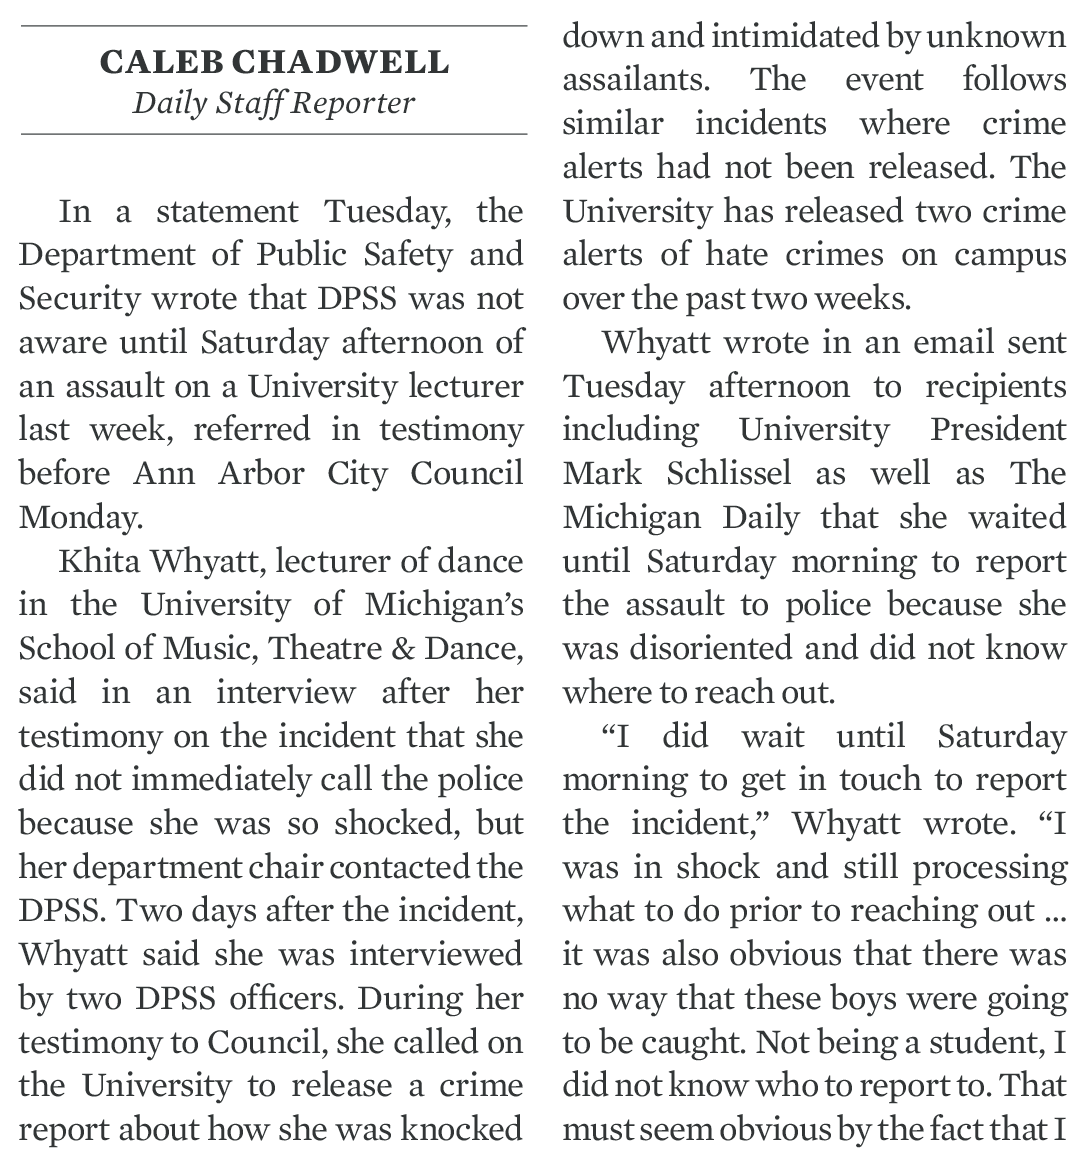

In [4]:
# So it looks like there are a few different functions we can call, and the segment
# function looks particularly appropriate. I love how expressive this library is on the
# documentation front -- I can see immediately that we are working with PIL.Image files,
# and the author has even indicated that we need to pass in either a binarized (e.g. '1')
# or grayscale (e.g. 'L') image. We can also see that the return value is a dictionary
# object with two keys, "text_direction" which will return to us a string of the
# direction of the text, and "boxes" which appears to be a list of tuples, where each
# tuple is a box in the original image.
#
# Lets try this on the image of text. I have a simple bit of text in a file called
# two_col.png which is from a newspaper on campus here
from PIL import Image
im=Image.open("images/two_col.png")
# Lets display the image inline
display(im)

In [5]:
# Lets now convert it to black and white and segment it up into lines with kraken
bounding_boxes=pageseg.segment(im.convert('1'))['boxes']
# And lets print those lines to the screen
print(bounding_boxes)

[[100, 50, 449, 74], [131, 88, 414, 120], [59, 196, 522, 229], [18, 239, 522, 272], [19, 283, 522, 316], [19, 327, 525, 360], [19, 371, 523, 404], [18, 414, 524, 447], [17, 458, 522, 491], [19, 502, 141, 535], [58, 546, 521, 579], [18, 589, 522, 622], [19, 633, 521, 665], [563, 21, 1066, 54], [564, 64, 1066, 91], [563, 108, 1066, 135], [564, 152, 1065, 179], [563, 196, 1065, 229], [563, 239, 1066, 272], [562, 283, 909, 316], [600, 327, 1066, 360], [562, 371, 1066, 404], [562, 414, 1066, 447], [563, 458, 1065, 485], [563, 502, 1065, 535], [562, 546, 1066, 579], [562, 589, 1064, 622], [562, 633, 1066, 660], [18, 677, 833, 704], [18, 721, 1066, 754], [18, 764, 1065, 797], [17, 808, 1065, 841], [18, 852, 1067, 885], [18, 895, 1065, 928], [17, 939, 1065, 972], [17, 983, 1067, 1016], [18, 1027, 1065, 1060], [18, 1070, 1065, 1103], [18, 1114, 1065, 1147]]


In [6]:
# Ok, pretty simple two column text and then a list of lists which are the bounding boxes of 
# lines of that text. Lets write a little routine to try and see the effects a bit more
# clearly. I'm going to clean up my act a bit and write real documentation too, it's a good
# practice
def show_boxes(img):
    '''Modifies the passed image to show a series of bounding boxes on an image as run by kraken
    
    :param img: A PIL.Image object
    :return img: The modified PIL.Image object
    '''
    # Lets bring in our ImageDraw object
    from PIL import ImageDraw
    # And grab a drawing object to annotate that image
    drawing_object=ImageDraw.Draw(img)
    # We can create a set of boxes using pageseg.segment
    bounding_boxes=pageseg.segment(img.convert('1'))['boxes']
    # Now lets go through the list of bounding boxes
    for box in bounding_boxes:
        # An just draw a nice rectangle
        drawing_object.rectangle(box, fill = None, outline ='red')
    # And to make it easy, lets return the image object
    return img

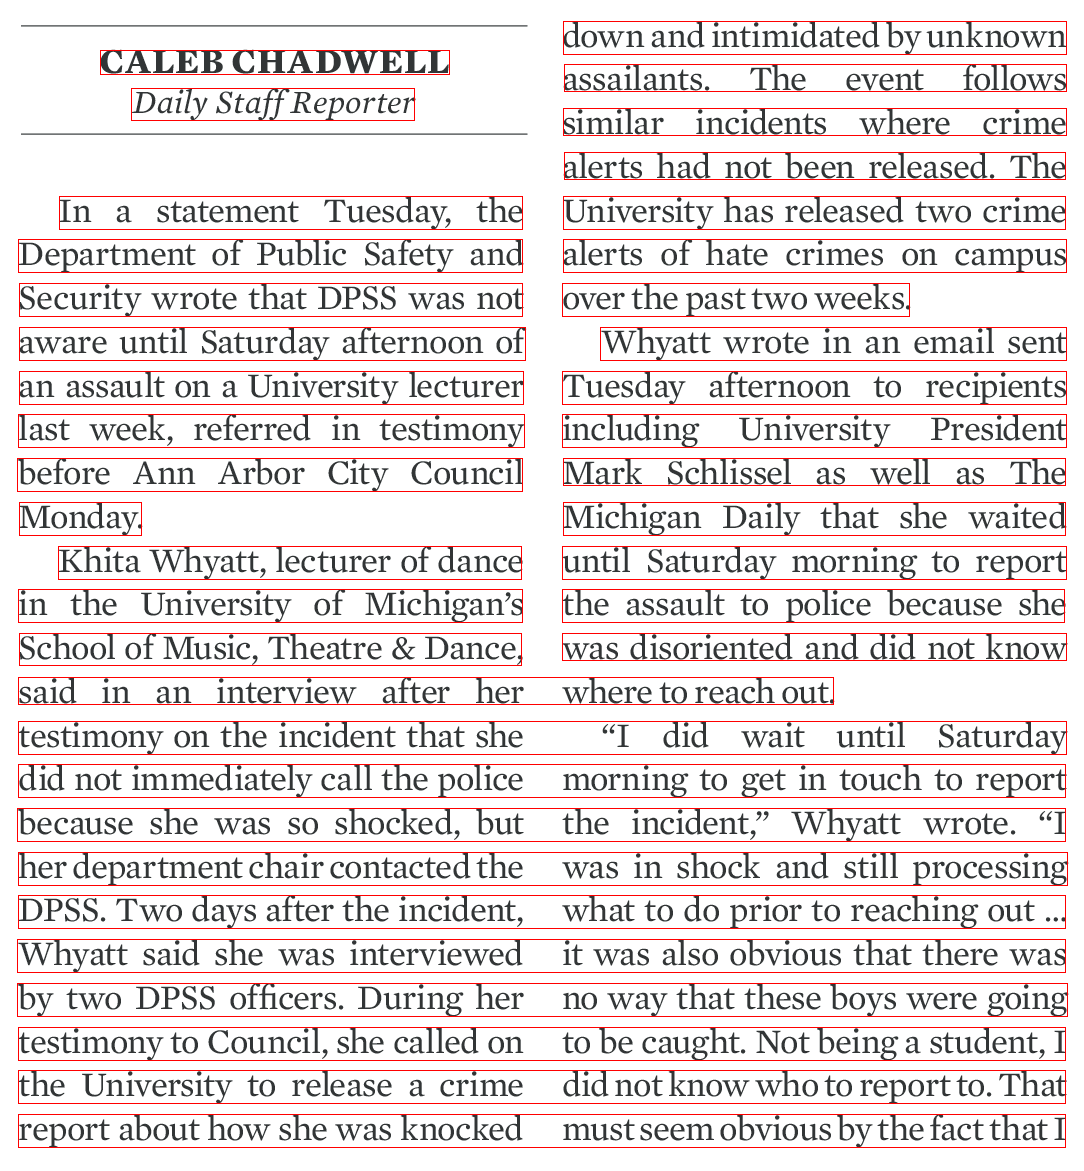

In [7]:
# To test this, lets use display
display(show_boxes(Image.open("images/two_col.png")))

In [8]:
# Not bad at all! It's interesting to see that kraken isn't completely sure what to do with this
# two column format. In some cases, kraken has identified a line in just a single column, while
# in other cases kraken has spanned the line marker all the way across the page. Does this matter?
# Well, it really depends on our goal. In this case, I want to see if we can improve a bit on this.
#
# So we're going to go a bit off script here. While this week of lectures is about libraries, the
# goal of this last course is to give you confidence that you can apply your knowledge to actual
# programming tasks, even if the library you are using doesn't quite do what you want. 
#
# I'd like to pause the video for the moment and collect your thoughts. Looking at the image above,
# with the two column example and red boxes, how do you think we might modify this image to improve
# kraken's ability to text lines?

In [9]:
# Thanks for sharing your thoughts, I'm looking forward to seeing the breadth of ideas that everyone
# in the course comes up with. Here's my partial solution -- while looking through the kraken docs on 
# the pageseg() function I saw that there are a few parameters we can supply in order to improve 
# segmentation. One of these is the black_colseps parameter. If set to True, kraken will assume that 
# columns will be separated by black lines. This isn't our case here, but, I think we have all of the
# tools to go through and actually change the source image to have a black separator between columns.
#
# The first step is that I want to update the show_boxes() function. I'm just going to do a quick
# copy and paste from the above but add in the black_colseps=True parameter
def show_boxes(img):
    '''Modifies the passed image to show a series of bounding boxes on an image as run by kraken
    
    :param img: A PIL.Image object
    :return img: The modified PIL.Image object
    '''
    # Lets bring in our ImageDraw object
    from PIL import ImageDraw
    # And grab a drawing object to annotate that image
    drawing_object=ImageDraw.Draw(img)
    # We can create a set of boxes using pageseg.segment
    bounding_boxes=pageseg.segment(img.convert('1'), black_colseps=True)['boxes']
    # Now lets go through the list of bounding boxes
    for box in bounding_boxes:
        # An just draw a nice rectangle
        drawing_object.rectangle(box, fill = None, outline ='red')
    # And to make it easy, lets return the image object
    return img

In [10]:
# The next step is to think of the algorithm we want to apply to detect a white column separator.
# In experimenting a bit I decided that I only wanted to add the separator if the space of was
# at least 25 pixels wide, which is roughly the width of a character, and six lines high. The
# width is easy, lets just make a variable
char_width=25
# The height is harder, since it depends on the height of the text. I'm going to write a routine
# to calculate the average height of a line
def calculate_line_height(img):
    '''Calculates the average height of a line from a given image
    :param img: A PIL.Image object
    :return: The average line height in pixels
    '''
    # Lets get a list of bounding boxes for this image
    bounding_boxes=pageseg.segment(img.convert('1'))['boxes']
    # Each box is a tuple of (top, left, bottom, right) so the height is just top - bottom
    # So lets just calculate this over the set of all boxes
    height_accumulator=0
    for box in bounding_boxes:
        height_accumulator=height_accumulator+box[3]-box[1]
        # this is a bit tricky, remember that we start counting at the upper left corner in PIL!
    # now lets just return the average height
    # lets change it to the nearest full pixel by making it an integer
    return int(height_accumulator/len(bounding_boxes))

# And lets test this with the image with have been using
line_height=calculate_line_height(Image.open("images/two_col.png"))
print(line_height)

31


In [11]:
# Ok, so the average height of a line is 31.
# Now, we want to scan through the image - looking at each pixel in turn - to determine if there
# is a block of whitespace. How bit of a block should we look for? That's a bit more of an art
# than a science. Looking at our sample image, I'm going to say an appropriate block should be
# one char_width wide, and six line_heights tall. But, I honestly just made this up by eyeballing
# the image, so I would encourage you to play with values as you explore.
# Lets create a new box called gap box that represents this area
gap_box=(0,0,char_width,line_height*6)
gap_box

(0, 0, 25, 186)

In [12]:
# It seems we will want to have a function which, given a pixel in an image, can check to see
# if that pixel has whitespace to the right and below it. Essentially, we want to test to see
# if the pixel is the upper left corner of something that looks like the gap_box. If so, then
# we should insert a line to "break up" this box before sending to kraken
#
# Lets call this new function gap_check
def gap_check(img, location):
    '''Checks the img in a given (x,y) location to see if it fits the description
    of a gap_box
    :param img: A PIL.Image file
    :param location: A tuple (x,y) which is a pixel location in that image
    :return: True if that fits the definition of a gap_box, otherwise False
    '''
    # Recall that we can get a pixel using the img.getpixel() function. It returns this value
    # as a tuple of integers, one for each color channel. Our tools all work with binarized
    # images (black and white), so we should just get one value. If the value is 0 it's a black
    # pixel, if it's white then the value should be 255
    #
    # We're going to assume that the image is in the correct mode already, e.g. it has been
    # binarized. The algorithm to check our bounding box is fairly easy: we have a single location 
    # which is our start and then we want to check all the pixels to the right of that location 
    # up to gap_box[2]
    for x in range(location[0], location[0]+gap_box[2]):
        # the height is similar, so lets iterate a y variable to gap_box[3]
        for y in range(location[1], location[1]+gap_box[3]):
            # we want to check if the pixel is white, but only if we are still within the image
            if x < img.width and y < img.height:
                # if the pixel is white we don't do anything, if it's black, we just want to
                # finish and return False
                if img.getpixel((x,y)) != 255:
                    return False
    # If we have managed to walk all through the gap_box without finding any non-white pixels
    # then we can return true -- this is a gap!
    return True

In [13]:
# Alright, we have a function to check for a gap, called gap_check. What should we do once
# we find a gap? For this, lets just draw a line in the middle of it. Lets create a new function
def draw_sep(img,location):
    '''Draws a line in img in the middle of the gap discovered at location. Note that
    this doesn't draw the line in location, but draws it at the middle of a gap_box
    starting at location.
    :param img: A PIL.Image file
    :param location: A tuple(x,y) which is a pixel location in the image
    '''
    # First lets bring in all of our drawing code
    from PIL import ImageDraw
    drawing_object=ImageDraw.Draw(img)
    # next, lets decide what the middle means in terms of coordinates in the image
    x1=location[0]+int(gap_box[2]/2)
    # and our x2 is just the same thing, since this is a one pixel vertical line
    x2=x1
    # our starting y coordinate is just the y coordinate which was passed in, the top of the box
    y1=location[1]
    # but we want our final y coordinate to be the bottom of the box
    y2=y1+gap_box[3]
    drawing_object.rectangle((x1,y1,x2,y2), fill = 'black', outline ='black')
    # and we don't have anything we need to return from this, because we modified the image

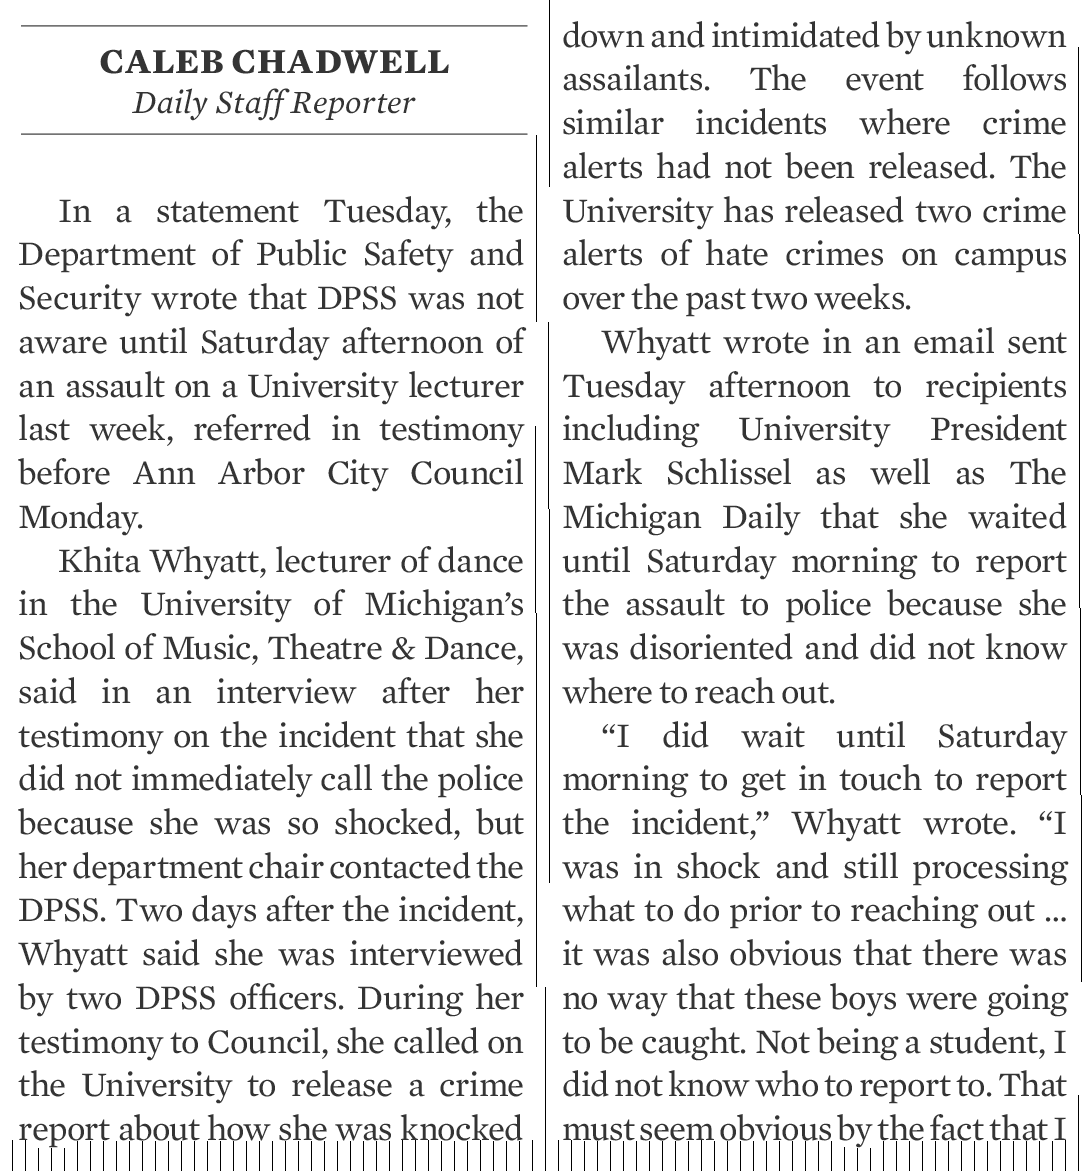

In [14]:
# Now, lets try it all out. This is pretty easy, we can just iterate through each pixel 
# in the image, check if there is a gap, then insert a line if there is.
def process_image(img):
    '''Takes in an image of text and adds black vertical bars to break up columns
    :param img: A PIL.Image file
    :return: A modified PIL.Image file
    '''
    # we'll start with a familiar iteration process
    for x in range(img.width):
        for y in range(img.height):
            # check if there is a gap at this point
            if (gap_check(img, (x,y))):
                # then update image to one which has a separator drawn on it
                draw_sep(img, (x,y))
    # and for good measure we'll return the image we modified
    return img

# Lets read in our test image and convert it through binarization
i=Image.open("images/two_col.png").convert("L")
i=process_image(i)
display(i)

#Note: This will take some time to run! Be patient!

In [15]:
# Looks like that is pretty accurate, and fixes the problem we faced. Feel free to experiment
# with different settings for the gap heights and width and share in the forums. You'll notice though 
# method we created is really quite slow, which is a bit of a problem if we wanted to use
# this on larger text. But I wanted to show you how you can mix your own logic and work with
# libraries you're using. Just because Kraken didn't work perfectly, doesn't mean we can't
# build something more specific to our use case on top of it.
#
# I want to end this lecture with a pause and to ask you to reflect on the code we've written
# here. We started this course with some pretty simple use of libraries, but now we're
# digging in deeper and solving problems ourselves with the help of these libraries. Before we
# go on to our last library, how well prepared do you think you are to take your python
# skills out into the wild?

## Comparing Image Data Structures

In [16]:
# OpenCV supports reading of images in most file formats, such as JPEG, PNG, and TIFF. Most image and 
# video analysis requires converting images into grayscale first. This simplifies the image and reduces 
# noise allowing for improved analysis. Let's write some code that reads an image of as person, Floyd 
# Mayweather and converts it into greyscale.

# First we will import the open cv package cv2 
import cv2 as cv
# We'll load the floyd.jpg image 
img = cv.imread('images/floyd.png')

# And we'll convert it to grayscale using the cvtColor image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Now, before we get to the result, lets talk about docs. Just like tesseract, opencv is an external
# package written in C++, and the docs for python are really poor. This is unfortunatly quite common
# when python is being used as a wrapper. Thankfully, the web docs for opencv are actually pretty good,
# so hit the website docs.opencv.org when you want to learn more about a particular function. In this
# case cvtColor converts from one color space to another, and we are convering our image to grayscale.
# Of course, we already know at least two different ways of doing this, using binarization and PIL
# color spaces conversions

# Lets instpec this object that has been returned.
import inspect
inspect.getmro(type(gray))

(numpy.ndarray, object)

In [18]:
# We see that it is of type ndarray, which is a fundamental list type coming from the numerical
# python project. That's a bit surprising - up until this point we have been used to working with
# PIL.Image objects. OpenCV, however, wants to represent an image as a two dimensional sequence 
# of bytes, and the ndarray, which stands for n dimensional array, is the ideal way to do this.
# Lets look at the array contents.
gray

array([[ 40,  39,  39, ...,  77,  76,  75],
       [ 43,  42,  42, ...,  76,  75,  75],
       [ 39,  39,  39, ...,  76,  75,  74],
       ...,
       [ 21,  22,  24, ..., 219, 223, 209],
       [ 18,  20,  22, ..., 196, 206, 196],
       [ 16,  18,  20, ..., 168, 182, 176]], dtype=uint8)

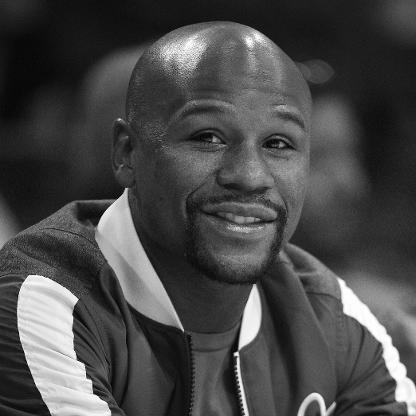

In [19]:
# The array is shown here as a list of lists, where the inner lists are filled with integers.
# The dtype=uint8 definition indicates that each of the items in an array is an 8 bit unsigned
# integer, which is very common for black and white images. So this is a pixel by pixel definition
# of the image.
#
# The display package, however, doesn't know what to do with this image. So lets convert it
# into a PIL object to render it in the browser.
from PIL import Image

# PIL can take an array of data with a given color format and convert this into a PIL object.
# This is perfect for our situation, as the PIL color mode, "L" is just an array of luminance
# values in unsigned integers
image = Image.fromarray(gray, "L")
display(image)

In [20]:
# Lets talk a bit more about images for a moment. Numpy arrays are multidimensional. For 
# instance, we can define an array in a single dimension:
import numpy as np
single_dim = np.array([25, 50 , 25, 10, 10])

# In an image, this is analagous to a single row of 5 pixels each in grayscale. But actually,
# all imaging libraries tend to expect at least two dimensions, a width and a height, and to
# show a matrix. So if we put the single_dim inside of another array, this would be a two
# dimensional array with element in the height direction, and five in the width direction
double_dim = np.array([single_dim])

double_dim

array([[25, 50, 25, 10, 10]])

In [21]:
# This should look pretty familiar, it's a lot like a list of lists! Lets see what this new
# two dimensional array looks like if we display it
display(Image.fromarray(double_dim, "L"))

In [22]:
# Pretty unexciting - it's just a little line. Five pixels in a row to be exact, of different
# levels of black. The numpy library has a nice attribute called shape that allows us to see how
# many dimensions big an array is. The shape attribute returns a tuple that shows the height of
# the image, by the width of the image
double_dim.shape

(1, 5)

In [23]:
# Lets take a look at the shape of our initial image which we loaded into the img variable
img.shape

(416, 416, 3)

In [24]:
# This image has three dimensions! That's because it has a width, a height, and what's called
# a color depth. In this case, the color is represented as an array of three values. Lets take a 
# look at the color of the first pixel
first_pixel=img[0][0]
first_pixel

array([33, 35, 53], dtype=uint8)

In [25]:
# Here we see that the color value is provided in full RGB using an unsigned integer. This
# means that each color can have one of 256 values, and the total number of unique colors
# that can be represented by this data is 256 * 256 *256 which is roughly 16 million colors.
# We call this 24 bit color, which is 8+8+8.
#
# If you find yourself shopping for a television, you might notice that some expensive models
# are advertised as having 10 bit or even 12 bit panels. These are televisions where each of
# the red, green, and blue color channels are represented by 10 or 12 bits instead of 8. For
# ten bit panels this means that there are 1 billion colors capable, and 12 bit panels are
# capable of over 68 billion colors!

In [26]:
# We're not going to talk much more about color in this course, but it's a fun subject. Instead,
# lets go back to this array representation of images, because we can do some interesting things
# with this.
#
# One of the most common things to do with an ndarray is to reshape it -- to change the number
# of rows and columns that are represented so that we can do different kinds of operations.
# Here is our original two dimensional image
print("Original image")
print(gray)
# If we wanted to represent that as a one dimensional image, we just call reshape
print("New image")
# And reshape takes the image as the first parameter, and a new shape as the second
image1d=np.reshape(gray,(1,gray.shape[0]*gray.shape[1]))
print(image1d)

Original image
[[ 40  39  39 ...  77  76  75]
 [ 43  42  42 ...  76  75  75]
 [ 39  39  39 ...  76  75  74]
 ...
 [ 21  22  24 ... 219 223 209]
 [ 18  20  22 ... 196 206 196]
 [ 16  18  20 ... 168 182 176]]
New image
[[ 40  39  39 ... 168 182 176]]


In [27]:
# So, why are we talking about these nested arrays of bytes, we were supposed to be talking
# about OpenCV as a library. Well, I wanted to show you that often libraries working on the
# same kind of principles, in this case images stored as arrays of bytes, are not representing
# data in the same way in their APIs. But, by exploring a bit you can learn how the internal
# representation of data is stored, and build routines to convert between formats.
#
# For instance, remember in the last lecture when we wanted to look for gaps in an image so
# that we could draw lines to feed into kraken? Well, we use PIL to do this, using getpixel()
# to look at individual pixels and see what the luminosity was, then ImageDraw.rectangle to
# actually fill in a black bar separator. This was a nice high level API, and let us write
# routines to do the work we wanted without having to understand too much about how the images
# were being stored. But it was computationally very slow.
#
# Instead, we could write the code to do this using matrix features within numpy. Lets take
# a look.
import cv2 as cv
# We'll load the 2 column image
img = cv.imread('images/two_col.png')
# And we'll convert it to grayscale using the cvtColor image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [28]:
# Now, remember how slicing on a list works, if you have a list of number such as 
# a=[0,1,2,3,4,5] then a[2:4] will return the sublist of numbers at position 2 through 4 
# inclusive - don't forget that lists start indexing at 0!
# If we have a two dimensional array, we can slice out a smaller piece of that using the
# format a[2:4,1:3]. You can think of this as first slicing along the rows dimension, then
# in the columns dimension. So in this example, that would be a matrix of rows 2, and 3,
# and columns 1, and 2. Here's a look at our image.
gray[2:4,1:3]

array([[255, 255],
       [255, 255]], dtype=uint8)

In [29]:
# So we see that it is all white. We can use this as a "window" and move it around our
# our big image.
#
# Finally, the ndarray library has lots of matrix functions which are generally very fast
# to run. One that we want to consider in this case is count_nonzero(), which just returns
# the number of entries in the matrix which are not zero.
np.count_nonzero(gray[2:4,1:3])

4

In [30]:
# Ok, the last benefit of going to this low level approach to images is that we can change
# pixels very fast as well. Previously we were drawing rectangles and setting a fill and line
# width. This is nice if you want to do something like change the color of the fill from the
# line, or draw complex shapes. But we really just want a line here. That's really easy to
# do - we just want to change a number of luminosity values from 255 to 0.
#
# As an example, lets create a big white matrix
white_matrix=np.full((12,12),255,dtype=np.uint8)
display(Image.fromarray(white_matrix,"L"))
white_matrix

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]],
      dtype=uint8)

In [31]:
# looks pretty boring, it's just a giant white square we can't see. But if we want, we can
# easily color a column to be black
white_matrix[:,6]=np.full((1,12),0,dtype=np.uint8)
display(Image.fromarray(white_matrix,"L"))
white_matrix

array([[255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255]],
      dtype=uint8)

In [32]:
# And that's exactly what we wanted to do. So, why do it this way, when it seems so much
# more low level? Really, the answer is speed. This paradigm of using matricies to store
# and manipulate bytes of data for images is much closer to how low level API and hardware
# developers think about storing files and bytes in memory.
#
# How much faster is it? Well, that's up to you to discover; there's an optional assignment
# for this week to convert our old code over into this new format, to compare both the
# readability and speed of the two different approaches.

## OpenCV

In [34]:
# Ok, we're just about at the project for this course. If you reflect on the specialization 
# as a whole you'll realize that you started with probably little or no understanding of python,
# progressed through the basic control structures and libraries included with the language
# with the help of a digital textbook, moved on to more high level representations of data
# and functions with objects, and now started to explore third party libraries that exist for
# python which allow you to manipulate and display images. This is quite an achievement!
#
# You have also no doubt found that as you have progressed the demands on you to engage in self-
# discovery have also increased. Where the first assignments were maybe straight forward, the
# ones in this week require you to struggle a bit more with planning and debugging code as
# you develop.
#
# But, you've persisted, and I'd like to share with you just one more set of features before
# we head over to a project. The OpenCV library contains mechanisms to do face detection on
# images. The technique used is based on Haar cascades, which is a machine learning approach.
# Now, we're not going to go into the machine learning bits, we have another specialization on
# Applied Data Science with Python which you can take after this if you're interested in that topic.
# But here we'll treat OpenCV like a black box.
#
# OpenCV comes with trained models for detecting faces, eyes, and smiles which we'll be using.
# You can train models for detecting other things - like hot dogs or flutes - and if you're
# interested in that I'd recommend you check out the Open CV docs on how to train a cascade
# classifier: https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html
# However, in this lecture we just want to use the current classifiers and see if we can detect
# portions of an image which are interesting.
#
# First step is to load opencv and the XML-based classifiers
import cv2 as cv
face_cascade = cv.CascadeClassifier('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml')